Music Genre Classification

1. Connecting Colab to GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/MyDrive/Colab Notebooks/MusicGenreDetection

/content/gdrive/MyDrive/Colab Notebooks/MusicGenreDetection


In [3]:
ls

data/  data.csv  genre_classifier_cnn.h5  MusicGenreDetection.ipynb  notes.gdoc


2. Loading Data

In [4]:
import os
import csv
import numpy as np

In [5]:
dataset = os.path.join(os.getcwd(), 'data/genres_original')
print(dataset)

/content/gdrive/MyDrive/Colab Notebooks/MusicGenreDetection/data/genres_original


3. Feature Extraction

In [6]:
import librosa
import pandas as pd

In [7]:
def get_class_code(class_name):
    if class_name == 'blues':
        return 0
    elif class_name == 'classical':
        return 1
    elif class_name == 'country':
        return 2
    elif class_name == 'disco':
        return 3
    elif class_name == 'hiphop':
        return 4
    elif class_name == 'jazz':
        return 5
    elif class_name == 'metal':
        return 6
    elif class_name == 'pop':
        return 7
    elif class_name == 'reggae':
        return 8
    elif class_name == 'rock':
        return 9

In [8]:
to_append = np.array(range(21))
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append)
    
for i in os.listdir(dataset):
    temp_path = os.path.join(dataset, i)
    print(i, ' features extracted...')
    for j in os.listdir(temp_path):
        current_song_path = os.path.join(temp_path, j)
        y, sc = librosa.load(current_song_path)
        mfcc = librosa.feature.mfcc(y=y)
        to_append = np.array([])
        for mean_val in mfcc:
            to_append = np.append(to_append, np.mean(mean_val))
        to_append = np.append(to_append, get_class_code(i))
    
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append)
            
print('--extraction complete--')

disco  features extracted...
jazz  features extracted...
hiphop  features extracted...
metal  features extracted...
pop  features extracted...
reggae  features extracted...
country  features extracted...
rock  features extracted...
classical  features extracted...
blues  features extracted...
--extraction complete--


In [9]:
data = pd.read_csv('data.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-111.096703,94.027962,12.417175,16.642750,8.123975,15.666401,-1.411972,7.022716,0.973053,-1.494219,-3.085720,-5.098383,-3.713450,0.226685,-2.103518,-1.815571,-5.322057,1.239463,-5.596891,-3.592719,3.0
1,-83.524353,64.488609,5.647238,2.704125,0.787572,6.166559,1.887543,1.978100,-1.810995,1.859412,2.458162,-0.223534,2.957042,-3.382444,-0.867831,0.047193,-1.565166,0.561841,0.300277,-2.782476,3.0
2,-53.139091,57.174351,21.162836,11.305180,18.122616,1.666931,0.351049,2.330658,-5.102267,2.749287,3.152155,-5.514364,-3.158053,-0.518785,-2.643273,-1.986541,-1.233337,-3.362679,-3.735123,-1.449847,3.0
3,-44.427231,52.308861,3.241821,43.953217,12.588358,24.510374,4.918080,15.308396,2.044262,10.394155,-1.465400,8.832397,0.410705,4.666180,-1.832787,2.984866,-2.035989,-3.349386,-4.155849,-0.357713,3.0
4,-28.996529,51.860023,-7.567776,21.508854,8.142488,18.112507,6.885487,6.562539,0.709288,11.163654,-1.810252,1.638895,-2.588552,-1.373494,-3.614005,0.215831,-0.391182,2.636313,-3.362998,-0.089296,3.0


4. Data Preparation

In [10]:
from sklearn.model_selection import train_test_split
print(data.shape)

y = data.pop('20')
x = data

(1000, 21)


In [11]:
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 20)
(800,)
(200, 20)
(200,)


5. Model Creation

In [13]:
from keras import models
from keras import layers

In [66]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

6. Training the Model

In [68]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=200, batch_size=128)

Epoch 1/200
7/7 [==============================] - 1s 75ms/step - loss: 5.3773 - accuracy: 0.0793 - val_loss: 2.2893 - val_accuracy: 0.1150
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 2.6486 - accuracy: 0.1133 - val_loss: 2.2131 - val_accuracy: 0.2000
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 2.3340 - accuracy: 0.1583 - val_loss: 2.1961 - val_accuracy: 0.2850
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 2.2311 - accuracy: 0.1784 - val_loss: 2.1754 - val_accuracy: 0.2650
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2110 - accuracy: 0.1545 - val_loss: 2.1258 - val_accuracy: 0.3000
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1836 - accuracy: 0.1675 - val_loss: 2.1003 - val_accuracy: 0.2900
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 2.1644 - accuracy: 0.2219 - val_loss: 2.0722 - val_accuracy: 0.3450
Epoch 8/200
7/7 [=========

In [69]:
from keras.models import load_model
model.save('genre_classifier_cnn.h5') 

7. Testing the Model

In [70]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [71]:
import matplotlib.pyplot as plt

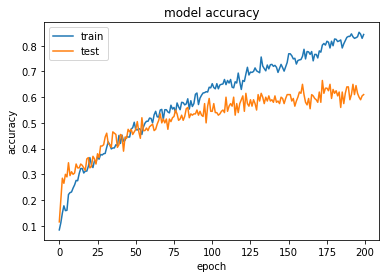

In [72]:
#plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

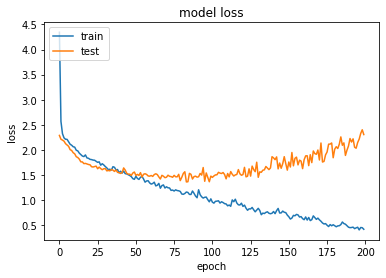

In [73]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()